In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
budata = pd.read_json('yelp_test_set\yelp_test_set_business.json',lines = True)
bdata = budata.copy()

del bdata['type']# since bdata['type'].nunique() == 1
del bdata['neighborhoods'] # since no useful data
#bdata.set_index('business_id', inplace = True)


In [3]:
# trying to mess with categories

cat = bdata.categories # this is a series

temp = set()
f = lambda x : temp.update(x)
cat.apply(f)
cat_counts = {el:0 for el in temp}

all_cat = []
k = lambda x: all_cat.extend(x)
cat.apply(k)

for e in all_cat:
    cat_counts[e] += 1

all_cat = list(temp) 

# all_cat is a list of all distinct categories
# cat_counts is a dict of category counts
 # do a pie chart

In [4]:
# doing some nonsense to unpack the categories to make the data frame more accesible

df_dict = {}
for category in all_cat:
    v_list = []
    for row in cat:
        t = []
        if category in row:
            v_list.append(1)
        else:
            v_list.append(0)
    df_dict[category] = v_list
lol = pd.DataFrame(df_dict)   # lol has all 508 categories with 1/0 associated with each row of bdata

In [5]:
con = [bdata, lol]

big = pd.concat(con, axis = 1)

del big['categories']
# big.head()



In [6]:
just_cat = big.copy()

del just_cat['city']
del just_cat['latitude']
del just_cat['longitude']
del just_cat['state']
del just_cat['stars']
del just_cat['business_id']
del just_cat['review_count']
del just_cat['name']
del just_cat['full_address']

#just_cat.head()

just_cat_open = pd.DataFrame(just_cat[just_cat['open'] == True])
del just_cat_open['open']
just_cat_closed = pd.DataFrame(just_cat[just_cat['open'] == False])
del just_cat_closed['open']

#just_cat_open.head()

In [7]:
open_cat_counts = {}
closed_cat_counts = {}
for cat in all_cat:
    open_cat_counts[cat] = just_cat_open[cat].sum()
    closed_cat_counts[cat] = just_cat_closed[cat].sum()

o = pd.Series(open_cat_counts)
o.sort_values(ascending=False, inplace=True)

c = pd.Series(closed_cat_counts)
c.sort_values(ascending=False, inplace=True)

f = lambda x: (x/11537.0) * 100.0 

oP = o.apply(f)
cP = c.apply(f)


In [233]:
print oP

Restaurants                      32.044726
Shopping                         13.599723
Food                             12.204213
Beauty & Spas                     6.492156
Automotive                        4.767271
Mexican                           4.645922
Active Life                       4.264540
Nightlife                         4.186530
Health & Medical                  4.056514
Fashion                           3.917830
Event Planning & Services         3.735807
Home Services                     3.493109
American (Traditional)            3.467106
Pizza                             3.363093
Bars                              3.363093
Hotels & Travel                   3.207073
Fast Food                         3.198405
Sandwiches                        2.843027
Grocery                           2.773685
Local Services                    2.695675
Hotels                            2.409639
Arts & Entertainment              2.383635
American (New)                    2.244951
Coffee & Te

In [234]:
print cP

Restaurants                         6.986218
Food                                1.802895
Nightlife                           1.360839
Bars                                1.118142
Shopping                            0.970790
Mexican                             0.814770
American (New)                      0.710757
American (Traditional)              0.693421
Pizza                               0.598076
Coffee & Tea                        0.598076
Italian                             0.511398
Sandwiches                          0.468059
Ice Cream & Frozen Yogurt           0.398717
Chinese                             0.346711
Buffets                             0.338043
Active Life                         0.286036
Lounges                             0.268701
Burgers                             0.260033
Barbeque                            0.251365
Arts & Entertainment                0.251365
Books, Mags, Music & Video          0.251365
Fashion                             0.242697
Delis     

In [8]:
just_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Columns: 371 entries, open to Yoga
dtypes: bool(1), int64(370)
memory usage: 3.4 MB


In [8]:
# looking at stars and ratings

bd = big.copy()

del bd['city']
del bd['latitude']
del bd['longitude']
del bd['state']
del bd['full_address']
del bd['name']
del bd['business_id']
#bd.sort_values('review_count', axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last')



b = bd[bd['open'] == True]
c = bd[bd['open'] == False]

# b['stars'].nunique() = 9 ; 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5

list_rat = [1,1.5,2,2.5,3,3.5,4,4.5,5]
brat_counts = []
crat_counts = []

for rating in list_rat:
    brat_counts.append(b[b['stars'] == rating].shape[0]) # get the number of rows per rating
    
for rating in list_rat:
    crat_counts.append(c[c['stars'] == rating].shape[0]) # get the number of rows per rating

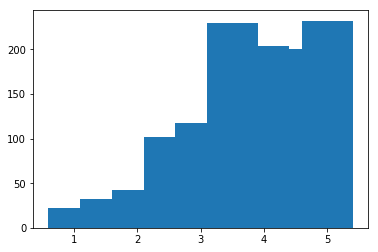

In [9]:
plt.figure()
plt.bar(list_rat,brat_counts)
plt.show()

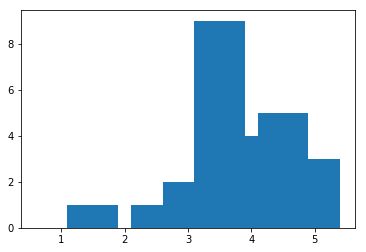

In [10]:
plt.figure()
plt.bar(list_rat,crat_counts)
plt.show()


In [285]:
print crat_counts

[0, 1, 0, 1, 2, 9, 4, 5, 3]


In [244]:
bdata.sort_values('review_count', axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last')
bdata.head()


,business_id,categories,city,full_address,latitude,longitude,name,open,review_count,stars,state
9533,hW0Ne_HTHEAgGF1rAdmR-g,"[Hotels & Travel, Airports]",Phoenix,"3400 E Sky Harbor Blvd\nPhoenix, AZ 85034",33.434750,-112.006440,Phoenix Sky Harbor International Airport,True,862,3.0,AZ
5498,VVeogjZya58oiTxK7qUjAQ,"[Pizza, Restaurants]",Phoenix,"623 E Adams St\nPhoenix, AZ 85004",33.449233,-112.065458,Pizzeria Bianco,True,803,4.0,AZ
3428,JokKtdXU7zXHcr20Lrk29A,"[Bars, Food, Breweries, Pubs, Nightlife, Ameri...",Tempe,"1340 E 8th St\nSte 104\nTempe, AZ 85281",33.419451,-111.915926,Four Peaks Brewing Co,True,735,4.5,AZ
6422,ntN85eu27C04nwyPa8IHtw,"[Breakfast & Brunch, Restaurants]",Phoenix,"801 N 1st St\nPhoenix, AZ 85004",33.456696,-112.072327,Matt's Big Breakfast,True,689,4.0,AZ
8283,EWMwV5V9BxNs_U6nNVMeqw,"[Bars, Mediterranean, Nightlife, Lounges, Amer...",Phoenix,"3815 N Central Ave\nPhoenix, AZ 85012",33.491645,-112.073196,FEZ,True,652,4.0,AZ


In [115]:
#s = pd.Series(temp, dtype="category")

#s.nunique() # shows 508 distinct categories

#pd.get_dummies(cat)

AttributeError: 'dict' object has no attribute 'extend'

In [72]:
redata = pd.read_json('yelp_training_set\yelp_training_set_review.json',lines = True)
rdata = redata.copy()

rdata.head()

,business_id,date,review_id,stars,text,type,user_id,votes
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}"
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{u'funny': 0, u'useful': 0, u'cool': 0}"
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{u'funny': 0, u'useful': 1, u'cool': 0}"
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,"{u'funny': 0, u'useful': 2, u'cool': 1}"
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,"{u'funny': 0, u'useful': 0, u'cool': 0}"


In [79]:
usdata = pd.read_json('yelp_training_set\yelp_training_set_user.json',lines = True)
udata = usdata.copy()

udata.set_index('user_id', inplace = True)

udata.head()

,average_stars,name,review_count,type,votes
user_id,,,,,
CR2y7yEm4X035ZMzrTtN9Q,5.0,Jim,6,user,"{u'funny': 0, u'useful': 7, u'cool': 0}"
_9GXoHhdxc30ujPaQwh6Ew,1.0,Kelle,2,user,"{u'funny': 0, u'useful': 1, u'cool': 0}"
8mM-nqxjg6pT04kwcjMbsw,5.0,Stephanie,2,user,"{u'funny': 0, u'useful': 1, u'cool': 0}"
Ch6CdTR2IVaVANr-RglMOg,5.0,T,2,user,"{u'funny': 0, u'useful': 2, u'cool': 0}"
NZrLmHRyiHmyT1JrfzkCOA,1.0,Beth,1,user,"{u'funny': 0, u'useful': 0, u'cool': 0}"


In [78]:
chdata = pd.read_json('yelp_training_set\yelp_training_set_checkin.json',lines = True)
cdata = chdata.copy()

cdata.set_index('business_id', inplace = True)
del cdata['type'] # since cdata['type'].nunique() == 1

cdata.head()

,checkin_info
business_id,
KO9CpaSPOoqm0iCWm5scmg,"{u'11-3': 17, u'10-1': 4, u'15-0': 2, u'15-3':..."
oRqBAYtcBYZHXA7G8FlPaA,"{u'0-5': 1, u'2-6': 2, u'2-5': 3, u'3-6': 1, u..."
6cy2C9aBXUwkrh4bY1DApw,"{u'8-5': 1, u'20-6': 1, u'15-3': 1, u'18-5': 1..."
D0IB17N66FiyYDCzTlAI4A,"{u'17-1': 1, u'10-5': 2, u'15-1': 1, u'20-0': ..."
HLQGo3EaYVvAv22bONGkIw,"{u'16-2': 1, u'14-5': 1, u'12-5': 2, u'15-4': ..."
